In [4]:
# load packages and generate data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from decimal import Decimal
from sklearn.metrics import mean_squared_error
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

# the true function to generate y (gaussian noise is added later)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# fix the seed so code is reproducable
np.random.seed(10)

# generate n_samples points
n_samples = 30
# fit polinomial degrees 1 to 20 (20 excluded) with a step of 2 (1, 3, 5, ..., 19)
degrees = np.arange(1,20,2)
print(degrees)

# generate training data
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1 # noise added here

[ 1  3  5  7  9 11 13 15 17 19]


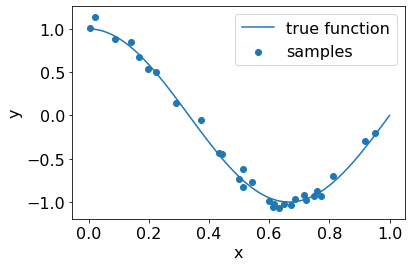

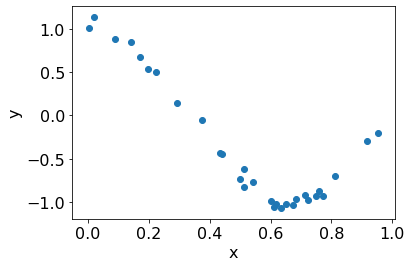

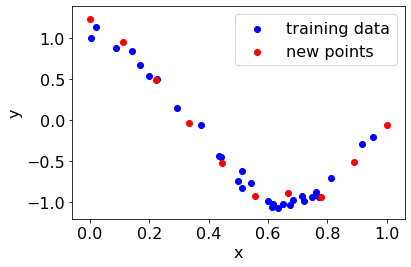

In [5]:
# plot the data and model
plt.figure(figsize=(6,4))
plt.scatter(X,y,label='samples')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.savefig('polifit.jpg',dpi=150)
plt.show()

# plot the data alone
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('polifit_nomodel.jpg',dpi=150)
plt.show()

# generate new points and plot those as well
X_new = np.linspace(0, 1, 10)

plt.figure(figsize=(6,4))
plt.scatter(X,y,label='training data',color='b')
plt.scatter(X_new,true_fun(X_new)+np.random.randn(10) * 0.1,color='r',label='new points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.savefig('polifit2.jpg',dpi=150)
plt.show()

0.8060735463217343
y' = 0.81-2.3*x^1
1.1081242784692316
y' = 1.11-1.29*x^1+-9.53*x^2+10.06*x^3
1.0953586481094357
y' = 1.1-2.38*x^1+5.45*x^2+-44.7*x^3+75.33*x^4+-34.87*x^5
1.0410134546227596
y' = 1.04+2.38*x^1+-57.2*x^2+281.36*x^3+-763.12*x^4+1100.28*x^5+-775.73*x^6+210.96*x^7
1.0359133403826946
y' = 1.04+2.82*x^1+-59.52*x^2+235.34*x^3+-233.93*x^4+-1166.68*x^5+4218.28*x^6+-5802.91*x^7+3763.98*x^8+-958.69*x^9
0.9612584176868453
y' = 0.96+16.12*x^1+-534.73*x^2+7200.61*x^3+-54083.66*x^4+246005.52*x^5+-711717.52*x^6+1338047.79*x^7+-1628066.67*x^8+1236361.23*x^9+-532590.62*x^10+99362.01*x^11
0.8908535610710218
y' = 0.89+36.4*x^1+-1776.83*x^2+35638.42*x^3+-388926.86*x^4+2595948.87*x^5+-11345048.47*x^6+33736041.23*x^7+-69493671.75*x^8+99212545.26*x^9+-96338916.18*x^10+60701675.23*x^11+-22374625.98*x^12+3661096.68*x^13
0.8907922922110132
y' = 0.89+37.18*x^1+-1920.98*x^2+43413.2*x^3+-569917.54*x^4+4895003.77*x^5+-29367438.09*x^6+127247461.09*x^7+-404129265.72*x^8+943926246.09*x^9+-1612570280.33

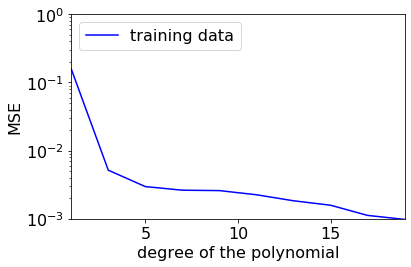

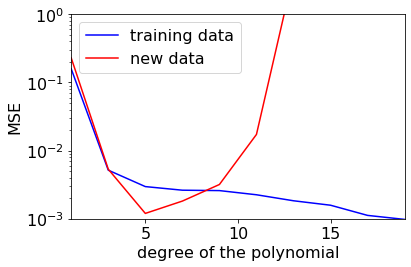

In [6]:
# train linear regression models and plot results

# arrays to save train and test MSE scores
train_MSE = np.zeros(len(degrees))
test_MSE = np.zeros(len(degrees))

# do the fit
for i in range(len(degrees)):
    # create the polynomial features
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    # load the linear regression model
    linear_regression = LinearRegression()
    # put the steps into a pipeline
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    # run .fit
    pipeline.fit(X[:, np.newaxis], y)

    # save the coefficients
    coefs = linear_regression.coef_
    
    # train and "test" scores
    train_MSE[i] = mean_squared_error(y,pipeline.predict(X[:, np.newaxis]))
    # this is not a proper test score because I just generate new data instead of splitting X and y
    X_test = np.linspace(0, 1, 100)
    test_MSE[i] = mean_squared_error(true_fun(X_test),pipeline.predict(X_test[:, np.newaxis]))
    
    # plot the results
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.vlines(X,np.minimum(y,pipeline.predict(X[:, np.newaxis])),np.maximum(y,pipeline.predict(X[:, np.newaxis])),linestyle=':')
        
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title('MSE on the training data = '+str(np.around(mean_squared_error(y,pipeline.predict(X[:, np.newaxis])),4)))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.savefig('polifit_'+str(degrees[i])+'.jpg',dpi=150)
    #plt.show()
    plt.close()
    print(linear_regression.intercept_)
    if coefs[0] <= 0:
        print("y' = "+str(np.around(linear_regression.intercept_,2))+'+'.join([(str(np.around(coefs[j],2)))+'*x^'+str(j+1) for j in range(len(coefs))]))
    else:
        print("y' = "+str(np.around(linear_regression.intercept_,2))+'+'+'+'.join([(str(np.around(coefs[j],2)))+'*x^'+str(j+1) for j in range(len(coefs))]))
        

plt.plot(degrees,train_MSE,color='b',label='training data')
plt.semilogy()
plt.xlabel('degree of the polynomial')
plt.ylabel('MSE')
plt.ylim([1e-3,1e0])
plt.xlim([1,19])
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('MSE_train.jpg',dpi=150)
plt.show()


plt.plot(degrees,train_MSE,color='b',label='training data')
plt.plot(degrees,test_MSE,color='r',label='new data')
plt.semilogy()
plt.xlabel('degree of the polynomial')
plt.ylabel('MSE')
plt.ylim([1e-3,1e0])
plt.xlim([1,19])
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('MSE_train_test.jpg',dpi=150)
plt.show()